Hi everyone,
1. Today I will analyze "Lower Back Pain Symptoms" dataset.
1. Then I will try some supervised machine learning algorithms.

Let's start with including some necessary libraries.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
#For ignoring warnings
import warnings
warnings.filterwarnings("ignore")
import os
print(os.listdir("../input"))

In [ ]:
data = pd.read_csv("../input/Dataset_spine.csv")

I think it is time to look our dataset.

In [ ]:
data.sample(5)

As you can see above, we have columns named like  "Col1, Col2, ..". 
1. We have a column named" Class_att". We need to learn its unique values.
1. And then we need to get rid of the "Unnamed : 13" column, also we need to delete rows which has NaN value.

Let's learn our unique classes.

In [ ]:
data["Class_att"].unique()

In [ ]:
data.dropna(axis = 1, inplace = True)
data.sample()

It is time to find relevances between our data values.
* To do this, I will use Seaborn library.

In [ ]:
#correlation map
import seaborn as sns
f, ax = plt.subplots(figsize = (18,18))
sns.heatmap(data.corr(), annot = True, fmt = '.2f', ax = ax)
plt.show()

Our data looks separable.
* Let's look some relevant values graph.

In [ ]:
data.Col2.plot(label = "Col2")
data.Col1.plot(label = "Col1")
plt.xlabel("index", color = "red")
plt.ylabel("values", color = "red")
plt.legend()
plt.title("Col1 and Col2")
plt.show()

As you can see, there is a significant discrimination.
* If you want more detailed correlation graphic for each value:

In [ ]:
color_list = ['red' if i=='Abnormal' else 'green' for i in data.loc[:,'Class_att']]
pd.plotting.scatter_matrix(data.loc[:, data.columns != 'Class_att'],
                                       c=color_list,
                                       figsize= [15,15],
                                       diagonal='hist',
                                       alpha=0.5,
                                       s = 200,
                                       marker = '.',
                                       edgecolor= "black")
plt.show()

Let's find out how many class types we have.

In [ ]:
sns.countplot(data = data, x = "Class_att")
plt.show()
data.loc[:,"Class_att"].value_counts()

As you can see above, we have 2 types of data whose are Abnormal and normal.

<br>***We have learned enough about our data so now we can apply some supervised learning algorithms.***
<h2> Supervised Machine Learning Topics:</h2>

1. KNN Classifier (with Grid Search)
1. KNN Classifier with Principal Component Analysis (PCA)
1. KNN Classifier with Linear Discriminant Analysis (LDA)
1. Logistic Regression Classifier
1. Decision Tree Classifier With K-fold Cross Validation And Confusion Matrix
1. Naive Bayes Classifier
1. Random Forest Classifier
1. Support Vector Machine Classifier

<br>Let's get started!

**KNN Classifier**
<br>The idea is to find a predefined number of training samples closest in distance to the new point, and predict the label from these.
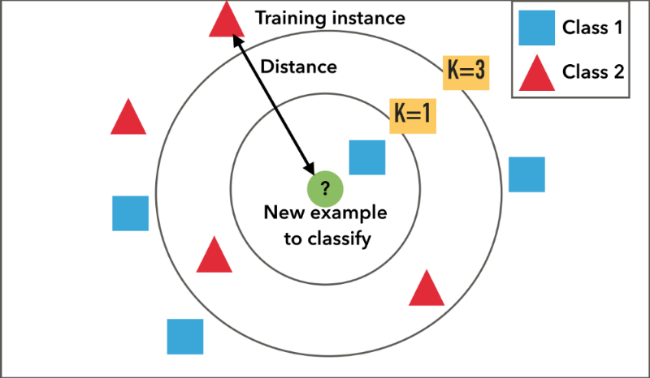
1. First thing we need to do is seperating our data to x and y.
1. Then split data to train and test
1. And apply KNN with Grid Search

In [ ]:
#x, y Split and Normalization
x_data = data.iloc[:, 0:12].values
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))#Normalization
y = data.iloc[:, 12]

#Train, Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 1)

#Grid Search
from sklearn.neighbors import KNeighborsClassifier
from sklearn.grid_search import GridSearchCV
grid = {"n_neighbors":np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid, cv = 10)#cv = How many data split do we want
knn_cv.fit(x_train, y_train)
print("Best number of neighbors is {}".format(knn_cv.best_params_["n_neighbors"]))
print("Best score is {}".format(round(knn_cv.best_score_,2)))

#Grid Search Visualization
score = []
for i in range(1,50):
    knn2 = KNeighborsClassifier(n_neighbors = i)
    knn2.fit(x_train, y_train)
    score.append(knn2.score(x_test, y_test))
plt.plot(np.arange(1,50), score)
plt.xlabel("Number of neighbors", color = "red", fontsize = 14)
plt.ylabel("Score", color = "red", fontsize = 14)
plt.show()

**KNN Classifier with Principal Component Analysis (PCA)**
1. PCA is basically lowers dimension of the data.
1. PCA helps us when we try to vizualize higher dimensioned data.

So let's apply PCA to our data.



In [ ]:
#Clone our data
data_pca = data.copy()
data_pca["Class_att"] = [1 if i == "Abnormal" else 0 for i in data_pca["Class_att"]]
#Then put it in PCA
from sklearn.decomposition import PCA
pca_model = PCA(n_components = 6)
pca_model.fit(data_pca)
data_pca = pca_model.transform(data_pca)

In [ ]:
# PCA Variance
plt.bar(range(pca_model.n_components_), pca_model.explained_variance_ratio_*100 )
plt.xlabel('PCA n_components',size=12,color='red')
plt.ylabel('Variance Ratio(%)',size=12,color='red')
plt.show()

As you can see below, if we increase the number of components, our data variance is **sharply decreasing,**
<br>which is good because this feature provides us **less complex data shape and less calculating time.**
* Now let's  learn **KNN with PCA.**

In [ ]:
#In this scenario, I want my data in 2 dimension.
pca_model = PCA(n_components = 2)
pca_model.fit(data_pca)
data_pca = pca_model.transform(data_pca)

In [ ]:
print("My old shape:", data.shape)
print("My new shape:", data_pca.shape)

In [ ]:
x_pca = data_pca[:,0]
y_pca = data_pca[:,1]
plt.scatter(x_pca, y_pca, c = ["red","green"])
plt.show()


As you can see, **we have converted (310, 13) to (310, 2) and vizualized**
* But wait a minute, what about scores?
<br>Let's find out them!

In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn_normal = KNeighborsClassifier()
knn_normal.fit(x_train, y_train)
print("KNN without PCA score :", knn_normal.score(x_test, y_test))


## KNN With PCA
#Train, Test Split
x_pca = x_pca.reshape(-1,1)
y_pca = y_pca.reshape(-1,1)
y_pca_edit = [round(float(i),0) for i in y_pca]
y_pca_edit = ["Abnormal" if i>0 else "Normal" for i in y_pca_edit]
y_pca_edit = np.array(y_pca_edit)
from sklearn.model_selection import train_test_split
x_pca_train, x_pca_test, y_pca_train, y_pca_test = train_test_split(x_pca, y_pca_edit, test_size = 0.1, random_state = 1)


from sklearn.neighbors import KNeighborsClassifier
knn_pca = KNeighborsClassifier()
knn_pca.fit(x_pca_train, y_pca_train)
print("KNN with PCA score    :", knn_pca.score(x_pca_test, y_pca_test))

There is a difference between "*with and without KNN with PCA*" score, **so PCA is really helpful when we need less data shape. Also if you have a less varience then you should use PCA.**

**KNN Classifier with Linear Discriminant Analysis (LDA)**
1. LDA is similar to PCA but **in LDA, we try to find best dimension that separates columns perfectly.**
1. Vice versa in PCA, we try to **separate all values from each other.**

So let's apply LDA to our data.



In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components = 2)# 13 ----> 2
x_train_lda = lda.fit_transform(x_train, y_train)
x_test_lda = lda.transform(x_test)

from sklearn.neighbors import KNeighborsClassifier
knn_lda = KNeighborsClassifier()
knn_lda.fit(x_train_lda, y_train)

print("KNN score :", knn_normal.score(x_test, y_test))
print("KNN with PCA score    :", knn_pca.score(x_pca_test, y_pca_test))
print("KNN with LDA score    :", knn_lda.score(x_test_lda, y_test))

**Logistic Regression Classifier**
<br>Logistic regression is named for the function used at the core of the method, the logistic function. Logistic regression is also a simple neural network because it has weight, bias and learning rate. In short, it has an iteration that tries to find bias and weights.
<br>Input values (x) are combined linearly using weights or coefficient values to predict an output value (y). If the output value is higher than 0.5 then it predicts 1, else it predicts 0. 
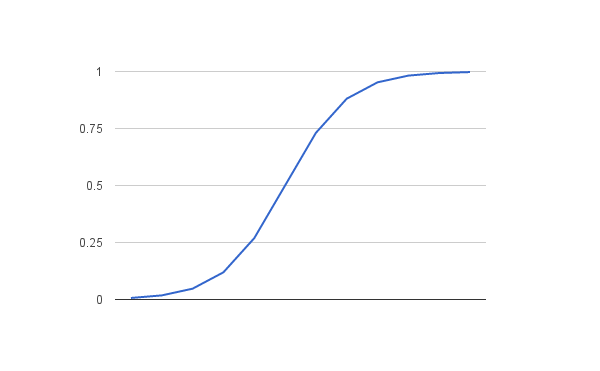

<br>Each column in your input data has an associated w and b coefficients that must be **learned** from your training data
<br>
<br>Let's implement Logistic Regression to our data.

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 100)#max_iter is for forward and backward propogation
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

<h1>**Decision Tree Classifier With K-fold Cross Validation And Confusion Matrix**</h1>

<br>**Confusion Matrix** is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known. 
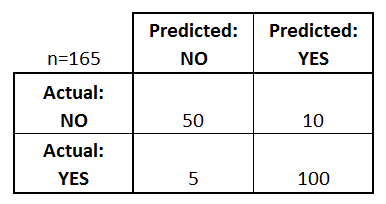
<br>**K-fold Cross Validation** is a *resampling procedure used to evaluate machine learning models on a limited data sample*. It has a single parameter called **k that refers to the number of groups that a given data sample is to be split into.** If k is given k=10 then this means our given data will be split into 10 pieces and also this means we have 10-fold cross-validation.
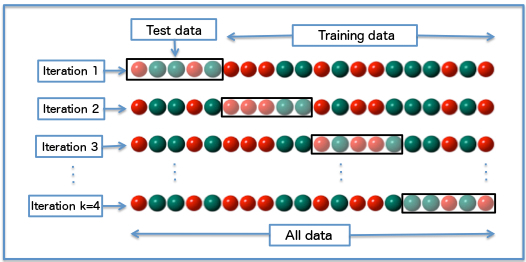
<br>**Decision Tree Classifier,** repetitively divides the working area(plot) into sub part by identifying lines.
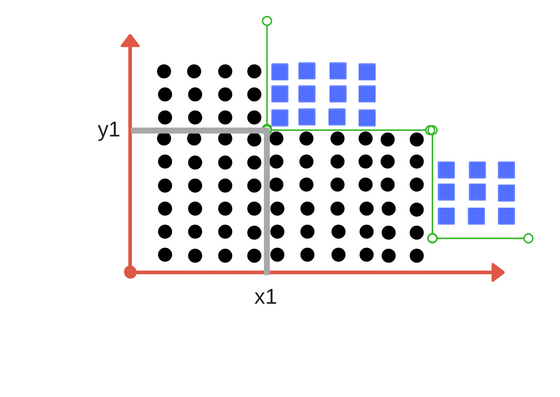
<br>Let's implement Decision Tree Classifier to our data.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state = 1)
dtc.fit(x_train, y_train)

#K-fold Cross Validation
from sklearn.model_selection import cross_val_score
cvs_scores = cross_val_score(knn_normal, x_pca_test, y_pca_test, cv=5) #cv=5 means, we will split our data into 5 pieces
print("Cross Validation score is", cvs_scores.mean())

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, dtc.predict(x_test))
print("Confusion Matrix \n",cm)

So we have 23 true predictions and 8 false predictions

**Naive Bayes Classifier**
Naive Bayes classifier uses probability theory to classify data. Naive Bayes classifier algorithms make use of Bayes' theorem. The key insight of Bayes' theorem is that the probability of an event can be adjusted as new data is introduced.

In [ ]:
#x, y Split and Normalization
x_data = data.iloc[:, 0:12].values
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))#Normalization
y = data.iloc[:, 12]

#Train, Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 1)

y_train=y_train.values.reshape(-1,1)
y_test=y_test.values.reshape(-1,1)

#Naive bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train)

print("Navie Bayes score is", gnb.score(x_test, y_test))

**Random Forest Classifier**
<br>Random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction.
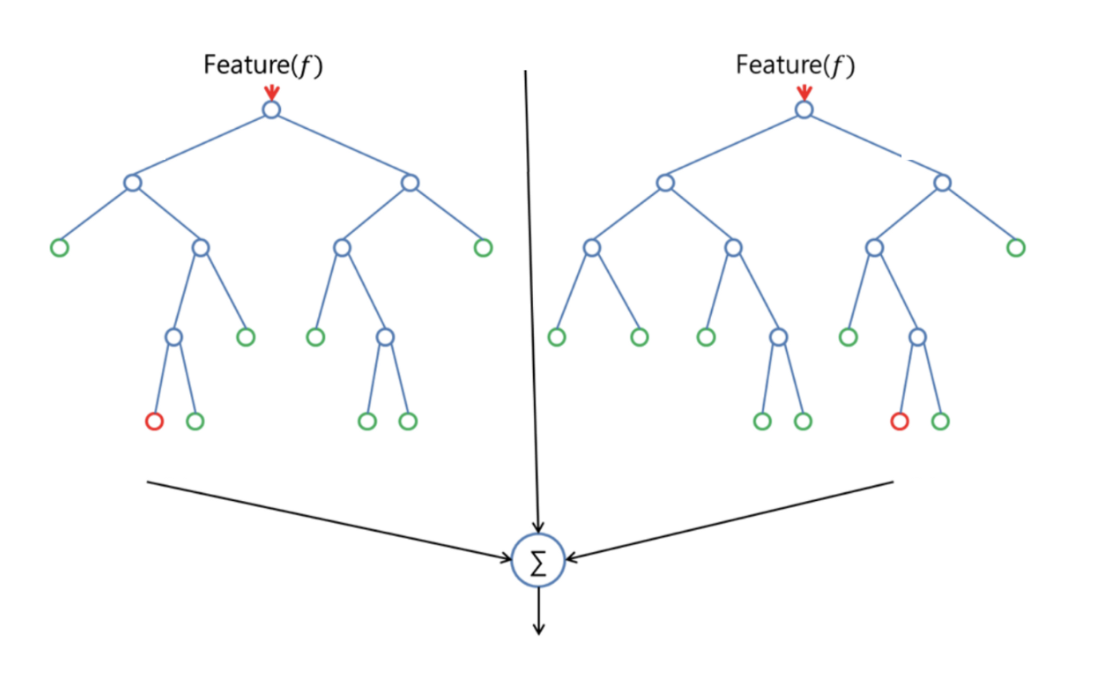

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=2, random_state=0, n_estimators=100)
#max_depth = The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure
#n_estimators = The number of trees in the forest.
rfc.fit(x_train, y_train)

print("Random Forest score is", rfc.score(x_test, y_test))

**Support Vector Machine Classifier**
<br> In this algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiate the two classes very well.
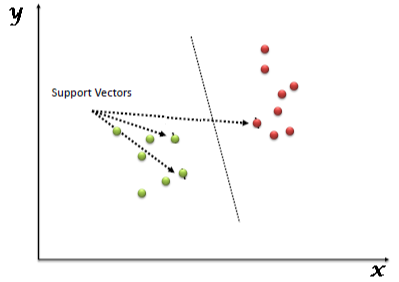

In [ ]:
from sklearn import svm
model = svm.SVC() 
model.fit(x_train, y_train)
print("Support Vector Machine score is", model.score(x_test, y_test))

<h1>Conclusion</h1>
There are a few of supervised machine learning methods in this paper and wrote this to remember all of these methods.

<h1>References</h1>
* scikit-learn.org
* machinelearningmastery.com/k-fold-cross-validation/
* dataschool.io/simple-guide-to-confusion-matrix-terminology/
* analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/
* towardsdatascience.com/the-random-forest-algorithm-d457d499ffcd
* www.techopedia.com/definition/32335/naive-bayes
analyticsvidhya.com/blog/2017/09/naive-bayes-explained/

<br>See you later in Deep Learning!